### Esercizio 09.1

Scrivere un codice in c++ per la risoluzione del TSP con un GA.

## Algoritmici Genetici - Guida alla lettura

#### Nomenclatura

- Fitness : Funzione da massimizzare, Distanza tra le città;
- Individuo : Set di valori, Città (30);
- Popolazione : Insieme di individui;
- Generazione : Evoluzione temporale della popolazione;

#### Struttura algoritmo

- Definizione della generazione iniziale (30 città shuffolate per ottenere una popolazione);
- Calcolo della Fitness;
- Definizione di una nuova generazione : Nuova popolazione con qualità elevata. Questo avviene tramite l'utilizzo degli algoritmi di Selezione, Crossover e Mutazione. 
    - ##### Selezione :
      Scelglie due genitori (Percorso) in base al valore della Fitness. Valori di Fitness più alti hanno maggior probabilità di venire scelti (implementazione della Roluette truccata) .
    - ##### Crossover & Mutazione :
       Dati due genitori crea due figli (vedere codice per capire algoritmo). Ogni figlio andrà incontro a mutazioni(ciascuna con $p_{i}<0.1$). Questi andranno a "rinnovare" la popolazione precedente. Si continua il processo finchè non si è creata una nuova popolazione.\\
        
        
Al fine di far convergere al meglio l'algoritmo si fa evolvere il sistema per $n$ generazioni.




## Cerchio Unitario

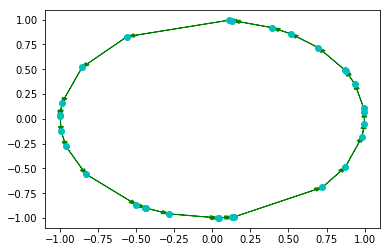

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import subprocess
from shutil import *
from glob import glob


y,x = np.loadtxt("Cerchio/fine_path.dat",unpack=True)

def plotTSP(path, points, num_iters=1):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list
    
    """

    # Unpack the primary TSP path and transform it into a list of ordered 
    # coordinates

    x = []; y = []
    for i in paths[0]:
       x.append(points[i][0])
       y.append(points[i][1])
    
    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads (there should be a reasonable default for this, WTF?)
    a_scale = float(max(x))/float(30)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]), 
                    head_width = a_scale, color = 'r', 
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)
		#plt.annotate('Start', (x[-1], y[-1]))
    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(min(x)*1.1, max(x)*1.1)
    plt.ylim(min(y)*1.1, max(y)*1.1)
			
    plt.show()



if __name__ == '__main__':
    # Run an example
    
    # Create a randomn list of coordinates, pack them into a list

    points = []
    for i in range(0, len(x)):
        points.append((x[i], y[i]))

    # Create two paths, teh second with two values swapped to simulate a 2-OPT
    # Local Search operation
    path=np.arange(30)
    # Pack the paths into a list
    paths = [path]
    
    # Run the function
    plotTSP(path, points, 1)


### Andamento Best Fitness in funzione delle iterazioni 

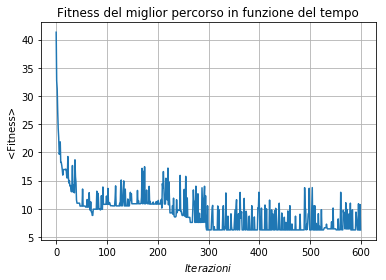

In [12]:
y = np.loadtxt("Cerchio/EvoFitne.dat",unpack=True)
g= 600 # numero di generazioni utilizzate

I=np.arange(g)

plt.plot(I,y)
plt.xlabel('$Iterazioni$')
plt.ylabel('$Fitness$')
plt.grid(True)
plt.title('Fitness del miglior percorso in funzione del tempo')


plt.show()



### Anadamento Fitness di metà della popolazione in funzione delle iterazioni

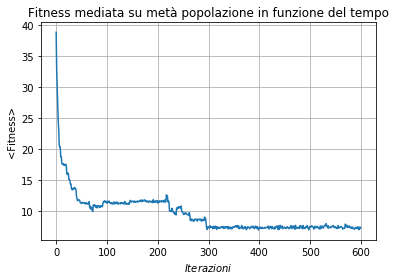

In [11]:
y = np.loadtxt("Cerchio/Fit_medio.dat",unpack=True)
g= 600 # numero di generazioni utilizzate

I=np.arange(g)

plt.plot(I,y)
plt.xlabel('$Iterazioni$')
plt.ylabel('$Fitness$')
plt.grid(True)
plt.title('Fitness mediata su metà popolazione in funzione del tempo')

plt.show()


## Quadrato ( $L=1$ )

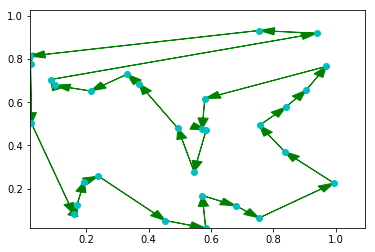

In [13]:
y,x = np.loadtxt("Quadrato/fine_path.dat",unpack=True)

def plotTSP(path, points, num_iters=1):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list
    
    """

    # Unpack the primary TSP path and transform it into a list of ordered 
    # coordinates

    x = []; y = []
    for i in paths[0]:
       x.append(points[i][0])
       y.append(points[i][1])
    
    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads (there should be a reasonable default for this, WTF?)
    a_scale = float(max(x))/float(30)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]), 
                    head_width = a_scale, color = 'r', 
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)
		#plt.annotate('Start', (x[-1], y[-1]))
    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(min(x)*1.1, max(x)*1.1)
    plt.ylim(min(y)*1.1, max(y)*1.1)
			
    plt.show()



if __name__ == '__main__':
    # Run an example
    
    # Create a randomn list of coordinates, pack them into a list

    points = []
    for i in range(0, len(x)):
        points.append((x[i], y[i]))

    # Create two paths, teh second with two values swapped to simulate a 2-OPT
    # Local Search operation
    path=np.arange(30)
    # Pack the paths into a list
    paths = [path]
    
    # Run the function
    plotTSP(path, points, 1)


### Andamento Best Fitness in funzione delle iterazioni 

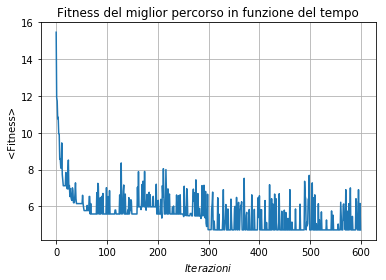

In [14]:
y = np.loadtxt("Quadrato/EvoFitne.dat",unpack=True)
g= 600 # numero di generazioni utilizzate

I=np.arange(g)

plt.plot(I,y)
plt.xlabel('$Iterazioni$')
plt.ylabel('$Fitness$')
plt.grid(True)
plt.title('Fitness del miglior percorso in funzione del tempo')


plt.show()

### Anadamento Fitness di metà della popolazione in funzione delle interazioni

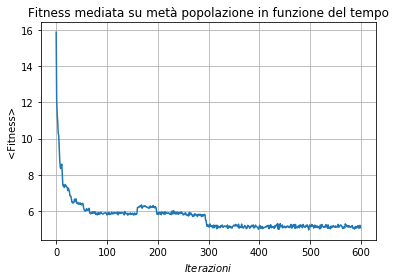

In [15]:
y = np.loadtxt("Quadrato/Fit_medio.dat",unpack=True)
g= 600 # numero di generazioni utilizzate

I=np.arange(g)

plt.plot(I,y)
plt.xlabel('$Iterazioni$')
plt.ylabel('$Fitness$')
plt.grid(True)
plt.title('Fitness mediata su metà popolazione in funzione del tempo')

plt.show()
